In [2]:
txt = 'KoNLPy는 한국어 정보처리를 위한 파이썬 패키지입니다. 설치법은 이 곳을 참고해주세요. NLP를 처음 시작하시는 분들은 시작하기 에서 가볍게 기본 지식을 습득할 수 있습니다.'

In [3]:
# 아래 내용들 : nltk 는 한국어에 제대로 적용이 안된다 ! 
import nltk
word_list = nltk.word_tokenize(txt)
word_list[:5]

['KoNLPy는', '한국어', '정보처리를', '위한', '파이썬']

In [4]:
from nltk import PorterStemmer
stem = PorterStemmer()
[stem.stem(word) for word in word_list]

['konlpy는',
 '한국어',
 '정보처리를',
 '위한',
 '파이썬',
 '패키지입니다',
 '.',
 '설치법은',
 '이',
 '곳을',
 '참고해주세요',
 '.',
 'nlp를',
 '처음',
 '시작하시는',
 '분들은',
 '시작하기',
 '에서',
 '가볍게',
 '기본',
 '지식을',
 '습득할',
 '수',
 '있습니다',
 '.']

In [5]:
from nltk.tag import pos_tag
pos = pos_tag(word_list)
pos[:5]

[('KoNLPy는', 'NNP'),
 ('한국어', 'NNP'),
 ('정보처리를', 'NNP'),
 ('위한', 'NNP'),
 ('파이썬', 'NNP')]

# KoNLPy(코엔엘파이)
- KoNLPY는 한국어 자연어 처리(Natural Language Processing) 파이썬 라이브러리이다.  한국어 처리를 위한 tokenize, 형태소 분석, 어간추출, 품사부착(POS Tagging) 등의 기능을 제공한다. 
- http://KoNLPy.org/ko/latest/
- 기존의 개발된 다양한 형태소 분석기를 통합해서 동일한 **interface**로 호출 할 수 있게 해준다.

## KoNLPy 설치 순서
1. Java 실행환경 설치
2. JPype1 설치
3. koNLPy 설치

### 1. Java설치
- https://www.oracle.com/java/technologies/downloads/
- OS에 맞게 다운로드 한다.
- 시스템 환경변수 설정
    - `JAVA_HOME` : 설치 경로 지정
    - `Path` : `설치경로\bin` 경로 지정

In [6]:
# '''
# 고급 시스템 설정 -> 환경변수
# 새로 만들기
# 변수 이름 : JAVA_HOME | 변수값 : C:\Users\jinhy\jdk-24_windows-x64_bin\jdk-24.0.1
# '''
# '''    
# 고급 시스템 설정 -> 환경변수
# PATH 변수 클릭
# 새로 만들기
# 변수값 : C:\Users\jinhy\jdk-24_windows-x64_bin\jdk-24.0.1\bin
# '''

### 2. JPype1 설치

- 파이썬에서 자바 모듈을 호출하기 위한 연동 패키지
- 설치: `!pip install JPype1`

### 3. KoNLPy 설치
- `pip install konlpy`

In [7]:
# %pip install JPype1 konlpy
import konlpy

## 형태소 분석기/사전
- 형태소 사전을 내장하고 있으며 형태소 분석 함수들을 제공하는 모듈

### KoNLPy 제공 형태소 분석기
- Open Korean Text
    - 트위터에서 개발 -> 신조어, 비속어 등에 강함
    - https://github.com/open-korean-text/open-korean-text
- Hannanum(한나눔)
    - KAIST Semantic Web Research Center 에서 개발
    - http://semanticweb.kaist.ac.kr/hannanum/
- Kkma(꼬꼬마)
    - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
    - http://kkma.snu.ac.kr/
- Komoran(코모란)
    - Shineware에서 개발.
    - 오픈소스버전과 유료버전이 있음
    - https://github.com/shin285/KOMORAN
- Mecab(메카브) 
    - 일본어용 형태소 분석기를 한국에서 사용할 수 있도록 수정
    - windows에서는 설치가 안됨 -> 따로 바꿔서 받아야함
    - 하지만 성능은 최고
    - https://bitbucket.org/eunjeon/mecab-ko


## 형태소 분석기 공통 메소드
- `morphs(string)` : 형태소 단위로 토큰화(tokenize)
- `nouns(string)` : 명사만 추출하여 토큰화(tokenize)    
- `pos(string)`: 품사 부착
    - 형태소 분석기 마다 사용하는 품사태그가 다르다.
        - https://konlpy-ko.readthedocs.io/ko/v0.5.2/morph/
- `tagset`: 형태소 분석기가 사용하는 품사태그 설명하는 속성. 

## KoNLPy 제공 말뭉치
1. kolaw: 대한민국 헌법 말뭉치
    - constitution.txt
2. kobill: 대한민국 국회 의안(국회에서 심의하는 안건-법률, 예산등) 말뭉치
    -1809890.txt ~ 1809899.txt

In [8]:
from konlpy.corpus import kolaw, kobill
kolaw.fileids()[:5], kobill.fileids()[:5]

(['constitution.txt'],
 ['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt'])

In [9]:
with kolaw.open('constitution.txt') as f:
    txt = f.read()
print(txt[:200])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제


# Konlpy와 nltk를 이용해 헌법 text 분석하기

In [10]:
# 형태소 분석기 객체를 생성. 종류별로 클래스가 제공
from konlpy.tag import Okt, Kkma

# 형태소 분석기 객체 생성 
okt = Okt()

# 형태소 단위 토큰화 - 어간 추출 
tokens = okt.morphs(txt)
print('토큰수 : ', len(tokens))
tokens[:10]

토큰수 :  8796


['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는']

In [11]:
# 형태소 단위 토큰화 - 원형 복원(okt)
tokens2 = okt.morphs(txt, stem=True)
print('토큰수 : ', len(tokens2))
tokens2[:10]

토큰수 :  8796


['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나다']

In [12]:
# 형태소 단위 토큰화 + 품사 필터 
nouns = okt.nouns(txt)
print('토큰수 : ', len(nouns))
nouns[:10]

토큰수 :  3882


['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

In [13]:
# 형태소 단위 토큰화 + 품사 태깅
pos = okt.pos(txt)
pos[:10]


[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb')]

In [14]:
# 품사 종류 확인
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [15]:
# OKT 기능 - 비속어 처리
sample_txt = '반갑습니당.'
# 토큰화 + 비속어 처리
print(okt.morphs(sample_txt, norm=True))
# 비속어 처리만
print(okt.normalize(sample_txt))

['반갑습니다', '.']
반갑습니다.


In [16]:
# 헌법 corpus를 분석
from nltk import Text, FreqDist
from wordcloud import WordCloud
from konlpy.tag import Okt
from konlpy.corpus import kolaw

# 1. 데이터 로딩
with kolaw.open('constitution.txt') as f:
    txt = f.read()

# 2. 전처리 - 명사와 동사만 추출 | 어간 추출
okt = Okt()
token_pos = okt.pos(txt)
token_pos

# 3. 토큰화
tokens = [token for token, pos in token_pos if pos in ['Noun', 'Verb'] and len(token) > 1]
print(len(tokens))

3635


In [17]:
# Text, FreqDist 분석 (EDA)
text = Text(tokens, name='헌법')
text, text.count('국민')

(<Text: 헌법>, 61)

c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans

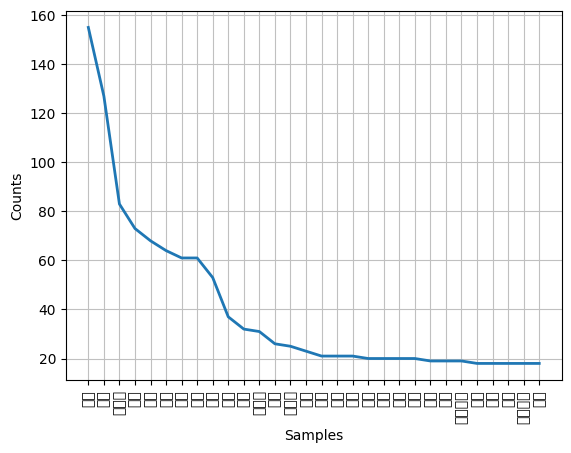

In [18]:
# 빈도수 그래프
text.plot(30);

c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54732 (\N{HANGUL SYLLABLE HEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\AppData\Local\miniconda3\envs\dl\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu San

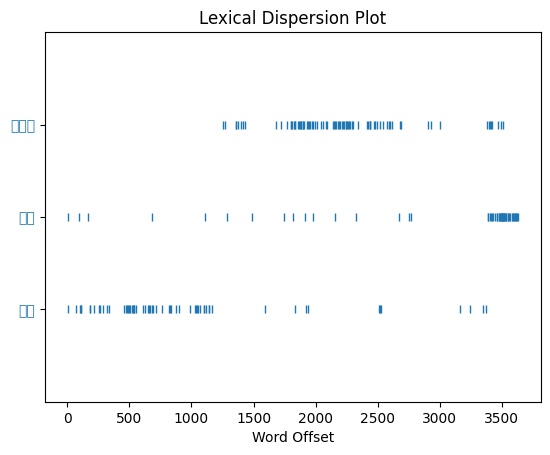

In [19]:
# 분포 그래프
text.dispersion_plot(['대통령', '헌법', '국민'])

In [20]:
fre = FreqDist(tokens)  # text.vocab()
print('총 단어 수 : ', fre.N())
print('고유 단어 개수 : ', fre.B())
print('가장 많이 나온 단어, 빈도수 : ', fre.most_common()[0][0], fre.get(fre.max()))
print('"헌법"의 빈도수, 비율 : ', fre['헌법'], '|', fre.freq('헌법'))


총 단어 수 :  3635
고유 단어 개수 :  929
가장 많이 나온 단어, 빈도수 :  한다 155
"헌법"의 빈도수, 비율 :  53 | 0.014580467675378267


In [21]:
# 폰트 파일 경로 조회
import matplotlib.font_manager as fm
# 폰트 이름, 폰트 경로
fm.fontManager.ttflist[0].name, fm.fontManager.ttflist[0].fname
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'malgun' in f.name.lower()]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf')]

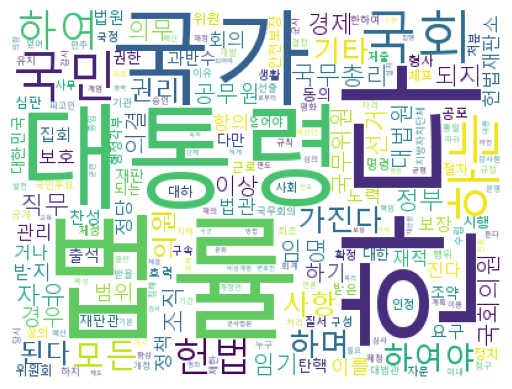

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(
    font_path='C:\\Windows\\Fonts\\malgun.ttf',
    max_words=200,
    min_font_size=2,
    relative_scaling=.5,
    width=400,
    height=300,
    background_color='white'
)
wc_img = wc.generate_from_frequencies(fre)
wc_img.to_file('constitution_wc.png')

plt.imshow(wc_img)
plt.axis('off')
plt.show()